In [88]:
import numpy as np
import pandas as pd
import scipy as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline

In [159]:
from fbprophet import Prophet
import logging



In [326]:
DataFrame = pd.read_csv("/home/sonam/Downloads/covid_19_data.csv")
DataFrame

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
3079,3080,03/02/2020,"Umatilla, OR",US,2020-03-02T20:23:16,1.0,0.0,0.0
3080,3081,03/02/2020,From Diamond Princess,Australia,2020-02-29T02:03:10,0.0,0.0,0.0
3081,3082,03/02/2020,"Lackland, TX (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0
3082,3083,03/02/2020,"Omaha, NE (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


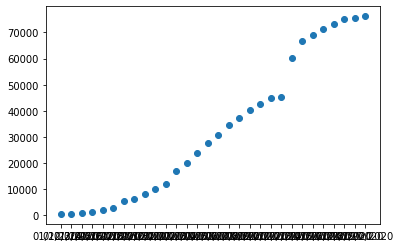

In [374]:
datewise=DataFrame.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})


train_df=pd.DataFrame(zip(list(datewise.index),list(datewise["Confirmed"])),columns=['ds','y'])
train_df = train_df[:30]

ds = train_df['ds']
y = train_df['y']
plt.scatter(ds,y)

In [337]:
m = Prophet()
m.fit(train_df)
future = m.make_future_dataframe(periods= prediction_size)
forecast = m.predict(future)
forecast

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-3926.513805,-8969.657394,-1480.529882,-3926.513805,-3926.513805,-1314.238083,-1314.238083,-1314.238083,-1314.238083,-1314.238083,-1314.238083,0.0,0.0,0.0,-5240.751889
1,2020-01-23,-2286.869900,-5742.169976,1508.003641,-2286.869900,-2286.869900,127.711498,127.711498,127.711498,127.711498,127.711498,127.711498,0.0,0.0,0.0,-2159.158402
2,2020-01-24,-647.225985,-2663.182189,4821.899890,-647.225985,-647.225985,1858.084812,1858.084812,1858.084812,1858.084812,1858.084812,1858.084812,0.0,0.0,0.0,1210.858826
3,2020-01-25,992.417928,-2122.685871,5448.625540,992.417928,992.417928,679.952561,679.952561,679.952561,679.952561,679.952561,679.952561,0.0,0.0,0.0,1672.370488
4,2020-01-26,2632.061862,-853.303703,6528.606869,2632.061862,2632.061862,293.481420,293.481420,293.481420,293.481420,293.481420,293.481420,0.0,0.0,0.0,2925.543282
5,2020-01-27,4272.154549,-210.090822,7298.282662,4272.154549,4272.154549,-619.690449,-619.690449,-619.690449,-619.690449,-619.690449,-619.690449,0.0,0.0,0.0,3652.464100
6,2020-01-28,5912.247266,1076.568205,8777.502971,5912.247266,5912.247266,-1025.301757,-1025.301757,-1025.301757,-1025.301757,-1025.301757,-1025.301757,0.0,0.0,0.0,4886.945509
7,2020-01-29,7552.956875,2701.282140,10315.671346,7552.956875,7552.956875,-1314.238083,-1314.238083,-1314.238083,-1314.238083,-1314.238083,-1314.238083,0.0,0.0,0.0,6238.718791
8,2020-01-30,9194.169655,5573.254938,13177.819972,9194.169655,9194.169655,127.711498,127.711498,127.711498,127.711498,127.711498,127.711498,0.0,0.0,0.0,9321.881153
9,2020-01-31,10836.017321,8705.701483,16584.952395,10836.017321,10836.017321,1858.084812,1858.084812,1858.084812,1858.084812,1858.084812,1858.084812,0.0,0.0,0.0,12694.102133


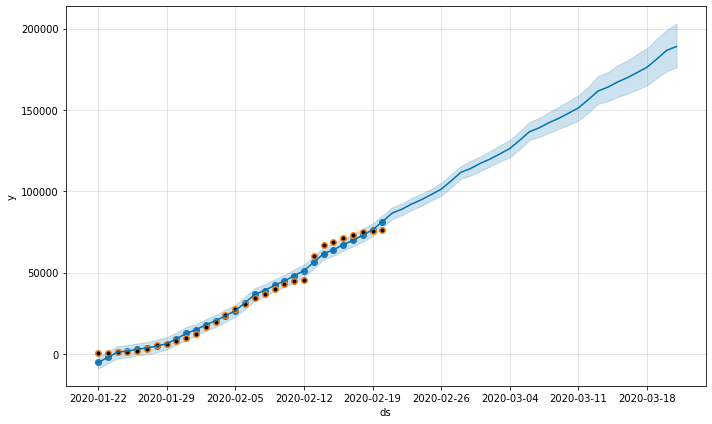

In [379]:
m.plot(forecast)
plt.scatter(df1['ds'],df1['yhat'])
plt.scatter(df1['ds'],y)